In [3]:
from dotenv import load_dotenv

load_dotenv()
# OR, the same with increased verbosity
load_dotenv(verbose=True)
# OR, explicitly providing path to '.env'
from pathlib import Path  # Python 3.6+ only

env_path = Path('../') / '.env'
load_dotenv(dotenv_path=env_path)

True

In [52]:
%matplotlib inline
from pymongo import MongoClient
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

mongo_cluster = MongoClient(os.environ['MONGO_URI']).iss

In [29]:
db = mongo_cluster.down_epochs_res
EPOCHS = [20, 30, 40, 50, 100]

acc = [
    [j['predicted'] for j in db.find({'downstream_epochs': i}, {'predicted': 1})] for i in EPOCHS
]

acc = np.array(acc)
acc_mean = np.mean(acc, axis=1)

df = pd.DataFrame()
df['epochs'] = EPOCHS
df['acc mean %'] = acc_mean / 256 * 100  #total test images
df

,epochs,acc mean %
0,20,22.031250
1,30,37.421875
2,40,41.015625
3,50,44.531250
4,100,41.406250


In [115]:
res_db = mongo_cluster.results2

transfer_res = [i for i in res_db.find({'model_type': 'eff_net_frozen'})]

transfer_predicted = np.array(
    [i['predicted'] for i in transfer_res]
).mean()
transfer_miss = np.array(
    [i['miss_classified'] for i in transfer_res]
).mean()
transfer_epsilon = np.array(
    [i['epsilon_mean'] for i in transfer_res]
).mean()
transfer_total_images = np.array(
    [i['total_test_images'] for i in transfer_res]
).mean()

transfer_accuracy = np.round(transfer_predicted / transfer_total_images * 100, 3)
transfer_miss_rate = np.round(transfer_miss / transfer_predicted * 100, 3)
transfer_epsilon = np.round(transfer_epsilon, 3)
print(
    f'EffNet in transfer learning -> accuracy = {transfer_accuracy}%, '
    f'miss rate = {transfer_miss_rate}%, epsilon mean = {transfer_epsilon}')

EffNet in transfer learning -> accuracy = 65.156%, miss rate = 94.245%, epsilon mean = 0.024


In [114]:
no_pr_res = [i for i in res_db.find({'model_type': 'efficientnetb0', 'pretext_task': {'$exists': False}})]

no_pr_predicted = np.array(
    [i['predicted'] for i in no_pr_res]
).mean()
no_pr_miss = np.array(
    [i['miss_classified'] for i in no_pr_res]
).mean()
no_pr_epsilon = np.array(
    [i['epsilon_mean'] for i in no_pr_res]
).mean()
no_pr_total_images = np.array(
    [i['total_test_images'] for i in no_pr_res]
).mean()

no_pr_accuracy = np.round(no_pr_predicted / no_pr_total_images * 100, 3)
no_pr_miss_rate = np.round(no_pr_miss / no_pr_predicted * 100, 3)
no_pr_epsilon = np.round(no_pr_epsilon, 3)
print(f'EffNet with no pretext task -> accuracy = {no_pr_accuracy}%, '
      f'miss rate = {no_pr_miss_rate}%, epsilon mean = {no_pr_epsilon}')

EffNet with no pretext task -> accuracy = 39.922%, miss rate = 99.413%, epsilon mean = 0.011


In [117]:
PR_EPOCHS = [25, 50, 75, 100]

jigsaw_predicted = []
jigsaw_miss = []
jigsaw_epsilon = []
jigsaw_total_images = []

for pe in PR_EPOCHS:
    jigsaw_res = [i for i in res_db.find({
        'model_type': 'efficientnetb0',
        'pretext_task': 'jigsaw',
        'pretext_epochs': pe
    })]

    jigsaw_predicted.append(np.array(
        [i['predicted'] for i in jigsaw_res]
    ).mean())
    jigsaw_miss.append(np.array(
        [i['miss_classified'] for i in jigsaw_res]
    ).mean())
    jigsaw_epsilon.append(np.array(
        [i['epsilon_mean'] for i in jigsaw_res]
    ).mean())
    jigsaw_total_images.append(np.array(
        [i['total_test_images'] for i in jigsaw_res]
    ).mean())

jigsaw_accuracy = np.round(np.array(jigsaw_predicted) / np.array(jigsaw_total_images) * 100, 3)
jigsaw_miss_rate = np.round(np.array(jigsaw_miss) / np.array(jigsaw_predicted) * 100, 3)
jigsaw_epsilon = np.round(jigsaw_epsilon, 3)

jigsaw_df = pd.DataFrame()
jigsaw_df['pretext epochs'] = PR_EPOCHS
jigsaw_df['accuracy %'] = jigsaw_accuracy
jigsaw_df['miss classification rate'] = jigsaw_miss_rate
jigsaw_df['epsilon mean'] = jigsaw_epsilon
jigsaw_df.to_latex('tables/jigsaw.tex')
jigsaw_df

/var/folders/vv/f22t8y7d1l96ynv9mzgy0j5w0000gn/T/ipykernel_62139/2955787819.py:37: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  jigsaw_df.to_latex('tables/jigsaw.tex')


,pretext epochs,accuracy %,miss classification rate,epsilon mean
0,25,43.984,95.915,0.012
1,50,43.438,97.482,0.011
2,75,43.281,93.141,0.013
3,100,42.188,95.000,0.012


In [118]:
rotation_predicted = []
rotation_miss = []
rotation_epsilon = []
rotation_total_images = []

for pe in PR_EPOCHS:
    rotation_res = [i for i in res_db.find({
        'model_type': 'efficientnetb0',
        'pretext_task': 'rotation',
        'pretext_epochs': pe
    })]

    rotation_predicted.append(np.array(
        [i['predicted'] for i in rotation_res]
    ).mean())
    rotation_miss.append(np.array(
        [i['miss_classified'] for i in rotation_res]
    ).mean())
    rotation_epsilon.append(np.array(
        [i['epsilon_mean'] for i in rotation_res]
    ).mean())
    rotation_total_images.append(np.array(
        [i['total_test_images'] for i in rotation_res]
    ).mean())

rotation_accuracy = np.round(np.array(rotation_predicted) / np.array(rotation_total_images) * 100, 3)
rotation_miss_rate = np.round(np.array(rotation_miss) / np.array(rotation_predicted) * 100, 3)
rotation_epsilon = np.round(rotation_epsilon, 3)

rotation_df = pd.DataFrame()
rotation_df['pretext epochs'] = PR_EPOCHS
rotation_df['accuracy %'] = rotation_accuracy
rotation_df['miss classification rate'] = rotation_miss_rate
rotation_df['epsilon mean'] = rotation_epsilon
rotation_df.to_latex('tables/rotation.tex')
rotation_df

/var/folders/vv/f22t8y7d1l96ynv9mzgy0j5w0000gn/T/ipykernel_62139/4231545544.py:35: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  rotation_df.to_latex('tables/rotation.tex')


,pretext epochs,accuracy %,miss classification rate,epsilon mean
0,25,44.219,96.643,0.012
1,50,44.141,97.876,0.012
2,75,46.953,95.674,0.012
3,100,44.531,97.544,0.012


In [119]:
best_res_df = pd.DataFrame()
best_res_df['pre-text task / pre-training'] = ['ImageNet', 'None', 'rotation', 'jigsaw']
best_res_df['accuracy %'] = [
    transfer_accuracy,
    no_pr_accuracy,
    rotation_accuracy.max(),
    jigsaw_accuracy.max()
]
best_res_df['miss rate %'] = [
    transfer_miss_rate,
    no_pr_miss_rate,
    rotation_miss_rate.min(),
    jigsaw_miss_rate.min()
]
best_res_df['epsilon'] = [
    transfer_epsilon,
    no_pr_epsilon,
    rotation_epsilon.max(),
    jigsaw_epsilon.max()
]
best_res_df.to_latex('tables/best_res.tex')
best_res_df

/var/folders/vv/f22t8y7d1l96ynv9mzgy0j5w0000gn/T/ipykernel_62139/1821283430.py:21: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  best_res_df.to_latex('tables/best_res.tex')


,pre-text task / pre-training,accuracy %,miss rate %,epsilon
0,ImageNet,65.156,94.245,0.024
1,None,39.922,99.413,0.011
2,rotation,46.953,95.674,0.012
3,jigsaw,43.984,93.141,0.013


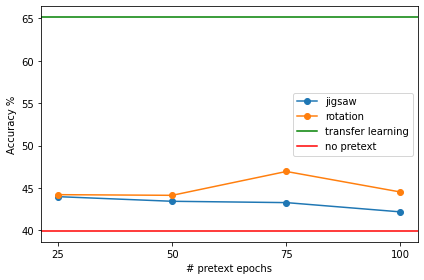

In [126]:
fig, ax = plt.subplots()
plt.plot(PR_EPOCHS, jigsaw_accuracy, marker='o')
plt.plot(PR_EPOCHS, rotation_accuracy, marker='o')
plt.axhline(y=transfer_accuracy, color='g', linestyle='-')
plt.axhline(y=no_pr_accuracy, color='r', linestyle='-')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy %')
ax.set_xlabel('# pretext epochs')
ax.set_xticks(PR_EPOCHS)
ax.set_xticklabels(PR_EPOCHS)
ax.legend(['jigsaw', 'rotation', 'transfer learning', 'no pretext'])
fig.tight_layout()
plt.savefig('plots/acc.png')

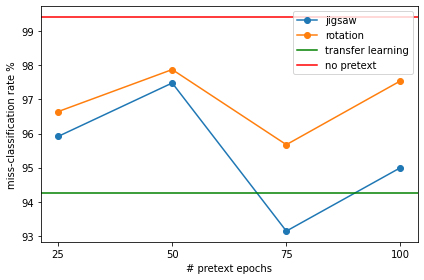

In [127]:
fig2, ax2 = plt.subplots()
plt.plot(PR_EPOCHS, jigsaw_miss_rate, marker='o')
plt.plot(PR_EPOCHS, rotation_miss_rate, marker='o')
plt.axhline(y=transfer_miss_rate, color='g', linestyle='-')
plt.axhline(y=no_pr_miss_rate, color='r', linestyle='-')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax2.set_ylabel('miss-classification rate %')
ax2.set_xlabel('# pretext epochs')
ax2.set_xticks(PR_EPOCHS)
ax2.set_xticklabels(PR_EPOCHS)
ax2.legend(['jigsaw', 'rotation', 'transfer learning', 'no pretext'])
fig2.tight_layout()
plt.savefig('plots/miss_rate.png')

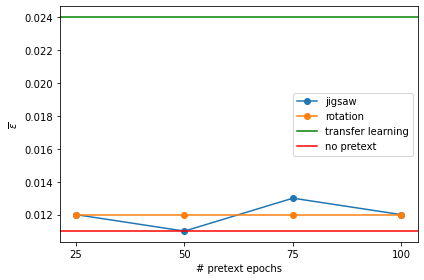

In [128]:
fig1, ax1 = plt.subplots()
plt.plot(PR_EPOCHS, jigsaw_epsilon, marker='o')
plt.plot(PR_EPOCHS, rotation_epsilon, marker='o')
plt.axhline(y=transfer_epsilon, color='g', linestyle='-')
plt.axhline(y=no_pr_epsilon, color='r', linestyle='-')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('$\overline{\epsilon}$')
ax1.set_xlabel('# pretext epochs')
ax1.set_xticks(PR_EPOCHS)
ax1.set_xticklabels(PR_EPOCHS)
ax1.legend(['jigsaw', 'rotation', 'transfer learning', 'no pretext'])
fig1.tight_layout()
plt.savefig('plots/epsilon.png')